In [40]:
import Pkg
Pkg.add("DelimitedFiles")
Pkg.add("StatsBase")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [42]:
using DelimitedFiles
filepath = "./music_genre_data.csv"
data = readdlm(filepath, ',')
#/Users/emily/Desktop/21-241\ Linear/

# 1000 data points, 199 dimensions of features


1000×199 Matrix{Any}:
 "filename"            "tempo"  …    "mfcc_mean_19_qt2"  "label"
 "blues.00000.wav"  123.047         5.49765              "blues"
 "blues.00001.wav"  107.666         4.69334              "blues"
 "blues.00002.wav"  161.499         1.26612              "blues"
 "blues.00003.wav"  172.266        -0.0298082            "blues"
 "blues.00004.wav"  135.999     …  -6.44956              "blues"
 "blues.00005.wav"  112.347        -3.64157              "blues"
 "blues.00006.wav"  123.047        -1.16217              "blues"
 "blues.00007.wav"   92.2852       -3.55858              "blues"
 "blues.00008.wav"   83.3543        1.4629               "blues"
 ⋮                              ⋱                        
 "rock.00091.wav"   143.555         2.27912              "rock"
 "rock.00092.wav"   129.199         0.877865             "rock"
 "rock.00093.wav"   103.359         3.85034              "rock"
 "rock.00094.wav"   112.347         6.21791              "rock"
 "rock.00095.w

In [43]:
data_num = Float64.(data[2:1000,2:198]) # removed the tile rows and columns, turn into float

# helpful slicing guide: https://web.eecs.umich.edu/~fessler/course/551/julia/tutor/04-slice.html

999×197 Matrix{Float64}:
 123.047   0.350129  0.0887717  1.0  …    0.941804   -3.57924   5.49765
 107.666   0.340849  0.0949762  1.0       0.290101   -4.28801   4.69334
 161.499   0.363538  0.0852566  1.0      -2.11265    -5.78995   1.26612
 172.266   0.404854  0.0939987  1.0      -3.72326    -6.86898  -0.0298082
 135.999   0.308526  0.0878431  1.0     -10.7488    -15.7779   -6.44956
 112.347   0.302522  0.0875513  1.0  …   -7.86505   -12.05     -3.64157
 123.047   0.291426  0.0939848  1.0      -7.29007   -12.3189   -1.16217
  92.2852  0.307372  0.0928533  1.0      -8.86685   -13.5451   -3.55858
  83.3543  0.408913  0.0865001  1.0      -2.48558    -6.58852   1.4629
 129.199   0.273968  0.0923106  1.0      -4.31022    -9.58593   0.823471
   ⋮                                 ⋱                ⋮        
 143.555   0.443463  0.0697015  1.0  …   -1.00998    -3.9848    2.27912
 129.199   0.416591  0.0737433  1.0      -2.27968    -5.55769   0.877865
 103.359   0.343422  0.0818708  1.0      -0.

In [569]:
using StatsBase
using Random

#applied normalization
X_standard = standardize(ZScoreTransform, data_num, dims=2) #standardizing accross the columns, so dims=2
#X_standard = data_num

# first parameter options: UnitRangeTransform, ZScoreTransform, see https://juliastats.org/StatsBase.jl/stable/transformations/#Unit-range-normalization-1

X_transposed = transpose(X_standard) # rows are dimensions, columns are datapoints
# X = X_transposed[:, shuffle(1:999)]

X = X_transposed[:, 1:999]

197×999 Matrix{Float64}:
 -0.0894125  -0.0854258  -0.0916424  …  -0.0967504  -0.0900336  -0.0917906
 -0.0912984  -0.0859269  -0.0944632     -0.0989054  -0.0911921  -0.0927449
 -0.0913024  -0.085928   -0.0944681     -0.0989114  -0.0911949  -0.092747
 -0.0912884  -0.0859238  -0.0944521     -0.0988959  -0.0911855  -0.0927399
 -0.0913037  -0.0859284  -0.0944695     -0.0989125  -0.0911959  -0.0927477
 -0.0912998  -0.0859274  -0.0944648  …  -0.0989064  -0.0911931  -0.0927457
 -0.091302   -0.085928   -0.0944673     -0.098909   -0.0911948  -0.0927467
 -0.0912959  -0.085926   -0.0944605     -0.0989028  -0.0911902  -0.0927437
 -0.0913017  -0.085928   -0.0944665     -0.0989113  -0.091195   -0.0927473
 -0.0913037  -0.0859284  -0.0944696     -0.0989126  -0.0911959  -0.0927477
  ⋮                                  ⋱                          
 -0.0914142  -0.0859516  -0.0946111     -0.0991993  -0.0912966  -0.0928085
 -0.0912755  -0.0859087  -0.0944637     -0.0990484  -0.0912022  -0.0927184
 -0.0912849

In [571]:
numNeighbors = 15
numPoints = 999
#numClusters = 10 # we figure out what this value is based of the first gap in eigenvalues

999

In [572]:
using DataFrames
using NearestNeighbors
kdtree = KDTree(X)


KDTree{StaticArraysCore.SVector{197, Float64}, Euclidean, Float64}
  Number of points: 999
  Dimensions: 197
  Metric: Euclidean(0.0)
  Reordered: true

In [573]:
idx, dists = knn(kdtree, X, numNeighbors + 1, true)

([[1, 740, 223, 521, 520, 11, 867, 935, 630, 262, 578, 253, 569, 257, 505, 261], [2, 38, 595, 763, 342, 599, 482, 451, 590, 83, 526, 316, 9, 829, 533, 40], [3, 49, 58, 140, 717, 279, 390, 557, 566, 52, 87, 525, 86, 153, 61, 258], [4, 560, 594, 538, 909, 520, 867, 935, 521, 569, 529, 740, 11, 21, 516, 269], [5, 22, 938, 207, 282, 18, 477, 479, 799, 858, 150, 836, 388, 765, 91, 844], [6, 880, 500, 784, 962, 743, 864, 881, 882, 869, 339, 203, 474, 789, 434, 212], [7, 515, 404, 136, 131, 8, 897, 638, 639, 16, 425, 906, 321, 114, 232, 688], [8, 404, 897, 136, 515, 7, 638, 234, 906, 387, 321, 668, 639, 457, 130, 16], [9, 526, 505, 40, 83, 262, 533, 260, 2, 521, 451, 595, 763, 935, 578, 256], [10, 937, 288, 24, 204, 675, 733, 918, 462, 251, 821, 875, 53, 870, 632, 644]  …  [990, 372, 773, 751, 701, 791, 680, 798, 845, 499, 847, 718, 406, 70, 455, 338], [991, 579, 971, 918, 942, 244, 934, 365, 644, 665, 351, 995, 282, 937, 216, 317], [992, 491, 206, 276, 493, 628, 926, 332, 371, 934, 941, 640,

In [574]:
idx

999-element Vector{Vector{Int64}}:
 [1, 740, 223, 521, 520, 11, 867, 935, 630, 262, 578, 253, 569, 257, 505, 261]
 [2, 38, 595, 763, 342, 599, 482, 451, 590, 83, 526, 316, 9, 829, 533, 40]
 [3, 49, 58, 140, 717, 279, 390, 557, 566, 52, 87, 525, 86, 153, 61, 258]
 [4, 560, 594, 538, 909, 520, 867, 935, 521, 569, 529, 740, 11, 21, 516, 269]
 [5, 22, 938, 207, 282, 18, 477, 479, 799, 858, 150, 836, 388, 765, 91, 844]
 [6, 880, 500, 784, 962, 743, 864, 881, 882, 869, 339, 203, 474, 789, 434, 212]
 [7, 515, 404, 136, 131, 8, 897, 638, 639, 16, 425, 906, 321, 114, 232, 688]
 [8, 404, 897, 136, 515, 7, 638, 234, 906, 387, 321, 668, 639, 457, 130, 16]
 [9, 526, 505, 40, 83, 262, 533, 260, 2, 521, 451, 595, 763, 935, 578, 256]
 [10, 937, 288, 24, 204, 675, 733, 918, 462, 251, 821, 875, 53, 870, 632, 644]
 ⋮
 [991, 579, 971, 918, 942, 244, 934, 365, 644, 665, 351, 995, 282, 937, 216, 317]
 [992, 491, 206, 276, 493, 628, 926, 332, 371, 934, 941, 640, 661, 283, 920, 380]
 [993, 267, 907, 116, 532,

In [575]:
#turns vector within vector into matrix
idxMatrix = mapreduce(permutedims, vcat, idx)

999×16 Matrix{Int64}:
   1  740  223  521  520   11  867  935  …  262  578  253  569  257  505  261
   2   38  595  763  342  599  482  451      83  526  316    9  829  533   40
   3   49   58  140  717  279  390  557      52   87  525   86  153   61  258
   4  560  594  538  909  520  867  935     569  529  740   11   21  516  269
   5   22  938  207  282   18  477  479     858  150  836  388  765   91  844
   6  880  500  784  962  743  864  881  …  869  339  203  474  789  434  212
   7  515  404  136  131    8  897  638      16  425  906  321  114  232  688
   8  404  897  136  515    7  638  234     387  321  668  639  457  130   16
   9  526  505   40   83  262  533  260     521  451  595  763  935  578  256
  10  937  288   24  204  675  733  918     251  821  875   53  870  632  644
   ⋮                        ⋮            ⋱         ⋮                        ⋮
 991  579  971  918  942  244  934  365  …  665  351  995  282  937  216  317
 992  491  206  276  493  628  926  332   

In [576]:
# adjancency list (list of indexes for k nearest neighbors at each index): 
neighbors = idxMatrix[:,2:numNeighbors + 1]


999×15 Matrix{Int64}:
 740  223  521  520   11  867  935  630  262  578  253  569  257  505  261
  38  595  763  342  599  482  451  590   83  526  316    9  829  533   40
  49   58  140  717  279  390  557  566   52   87  525   86  153   61  258
 560  594  538  909  520  867  935  521  569  529  740   11   21  516  269
  22  938  207  282   18  477  479  799  858  150  836  388  765   91  844
 880  500  784  962  743  864  881  882  869  339  203  474  789  434  212
 515  404  136  131    8  897  638  639   16  425  906  321  114  232  688
 404  897  136  515    7  638  234  906  387  321  668  639  457  130   16
 526  505   40   83  262  533  260    2  521  451  595  763  935  578  256
 937  288   24  204  675  733  918  462  251  821  875   53  870  632  644
   ⋮                        ⋮                        ⋮                 
 579  971  918  942  244  934  365  644  665  351  995  282  937  216  317
 491  206  276  493  628  926  332  371  934  941  640  661  283  920  380
 267  

In [577]:
adj = zeros(numPoints, numPoints)

999×999 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [578]:
for i in 1:numPoints 
    for j in 1:numNeighbors
      adj[i, neighbors[i, j]] = 1
      adj[neighbors[i, j], i] = 1
    end
  end


In [579]:
adj

999×999 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [580]:
degree = zeros(numPoints, numPoints)  

999×999 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [581]:
for i in 1:numPoints
    degree[i, i] = sum(adj[i,:])
  end

In [582]:
degree

999×999 Matrix{Float64}:
 19.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  24.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  19.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  21.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  18.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  19.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  ⋮                             ⋮    ⋱               ⋮                
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.

In [583]:
laplacian = degree - adj

999×999 Matrix{Float64}:
 19.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  24.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  19.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  21.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  18.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  19.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  ⋮                             ⋮    ⋱               ⋮                
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0  -1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.

In [584]:
using LinearAlgebra
eigenval, eigenvec = eigen(laplacian)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
999-element Vector{Float64}:
  7.105427357601002e-15
  0.05276028293415891
  0.17034612770755686
  0.3315012278245817
  0.4998560563735843
  0.5667991478062042
  0.776683094948897
  1.0111318082189058
  1.174601737529997
  1.281204341870648
  ⋮
 28.68841779004987
 28.73657236670886
 28.88582473782385
 28.910323338297708
 28.994727607405768
 29.475298544122065
 29.50562630897379
 29.711621253152618
 29.767897446789103
vectors:
999×999 Matrix{Float64}:
 -0.0316386  -0.0293938    0.035179    …  -0.000891274  -2.74763e-11
 -0.0316386  -0.0310342    0.0420001       0.00630526   -2.90531e-11
 -0.0316386  -0.0227233    0.00924858      1.45584e-5   -9.77464e-9
 -0.0316386  -0.0292911    0.0353365      -0.000289569   4.23756e-10
 -0.0316386  -0.0177488   -0.00779701     -6.151e-5      6.62644e-10
 -0.0316386   0.0202389   -0.0440669   …   3.56946e-10  -0.000149554
 -0.0316386  -0.00331965  -0.026622        1.97321e-7   -4.80608e-

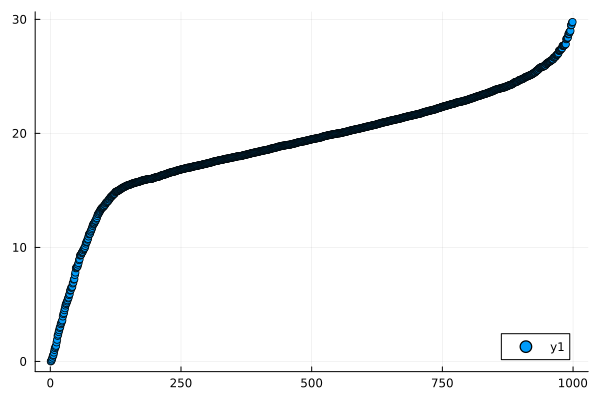

In [587]:
using Plots
scatter(collect(1:999), eigenval)
# naturals vs eigenval

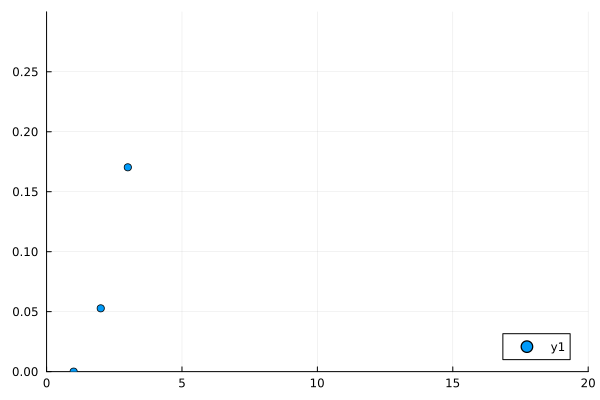

In [588]:
scatter(collect(1:999), eigenval, xlim=(0, 20), ylim=(0,0.3))

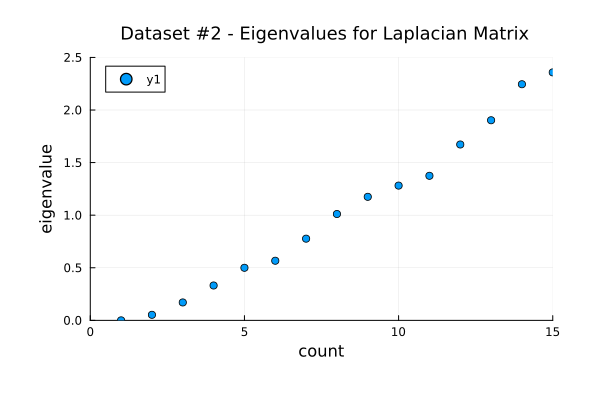

In [617]:
scatter(collect(1:999), eigenval, xlim=(0, 15), ylim=(0,2.5), xlabel="count", ylabel="eigenvalue", title="\n Dataset #2 - Eigenvalues for Laplacian Matrix",titlefont=font(12), bottom_margin = 10mm, top_margin = 5mm, left_margin = 10mm, right_margin = 10mm)

In [ ]:
# specify number of clusters
numClusters = 10

In [586]:
A = eigenvec[:,2:numClusters + 1]
#A = eigenvec[:, 2:12]

999×10 Matrix{Float64}:
 -0.0293938    0.035179    -0.0334486   …   0.0470569   -0.0143408
 -0.0310342    0.0420001   -0.0470995      -0.0229894    0.0246733
 -0.0227233    0.00924858   0.0140039       0.0457402    0.0193935
 -0.0292911    0.0353365   -0.0358626       0.0496344    0.0107764
 -0.0177488   -0.00779701   0.0360993      -0.014403     0.0377067
  0.0202389   -0.0440669   -0.0316551   …   0.00202072   0.0548002
 -0.00331965  -0.026622     0.0138287      -0.0523187   -0.0396023
  0.0012259   -0.032191     0.00798781     -0.0531269   -0.0326449
 -0.0305315    0.0399622   -0.0432354       0.00504699   0.0124848
 -0.0179488   -0.00636437   0.0333372       0.0074961    0.0243262
  ⋮                                     ⋱               
 -0.0166182   -0.0108075    0.0382607   …   0.00384534   0.0242289
 -0.0107012   -0.0248108    0.0414761       0.0147877   -0.0195429
 -0.0252237    0.0187051   -0.00265445      0.079108    -0.00261322
 -0.0212543    0.00321073   0.025336        0.0

KMeans

In [590]:
# Perform k means

using RDatasets, Clustering
km = kmeans(transpose(A), numClusters)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.028546564657171706 -0.021597269048504203 … -0.02086332916723031 -0.008039996220831633; 0.030268007981108132 0.00460206242977457 … 0.008444515783257821 -0.029079094579514898; … ; -0.02924664555795352 -0.005966657960605036 … -0.03293339849568234 0.019968544935310847; -0.042509237591602515 0.03778174763534883 … 0.0159058379851515 -0.014369886469550026], [8, 3, 8, 8, 2, 7, 5, 5, 3, 2  …  6, 2, 10, 8, 2, 10, 1, 7, 1, 10], [0.0021904444990946056, 0.00029906272586432275, 0.004403254546659114, 0.0038066549503031587, 0.004149887070787665, 0.002584477063114231, 0.0020541342119398554, 0.003098666758271416, 0.0022733391345291926, 0.0029581577754812967  …  0.00035756440395321235, 0.0027350651058930774, 0.0006002015866235881, 0.0015042979849765326, 0.0005653309868091181, 0.0026893890890539226, 0.0012221433492881455, 0.0041191479597722305, 0.0037277763812663053, 0.0007978142484056355], [92, 131, 48, 117, 131, 96, 127, 110, 47, 100], [92, 131, 48, 117,

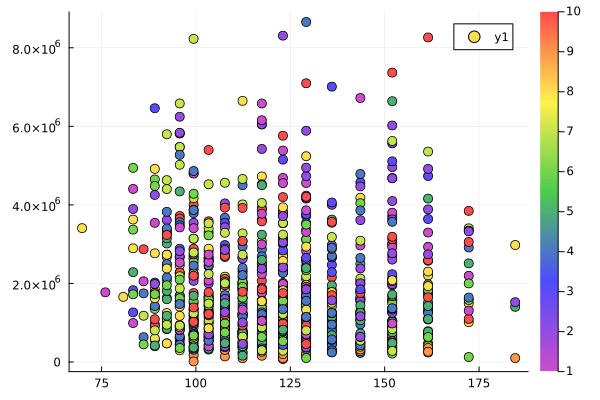

In [592]:
using Plots
s = 5 # specify size of data point
scatter(transpose(data_num)[1, :], transpose(data_num)[31, :], marker_z=km.assignments, color=:lightrainbow, legend=true,markersize=s)


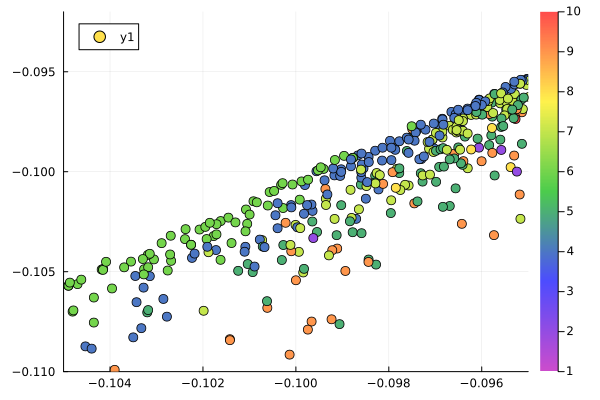

In [591]:
using Plots
s = 5
scatter(X[1, :], X[2, :], marker_z=km.assignments, color=:lightrainbow, legend=true, xlims=(-0.105, -0.095), ylims=(-0.11, -0.092), markersize=s)


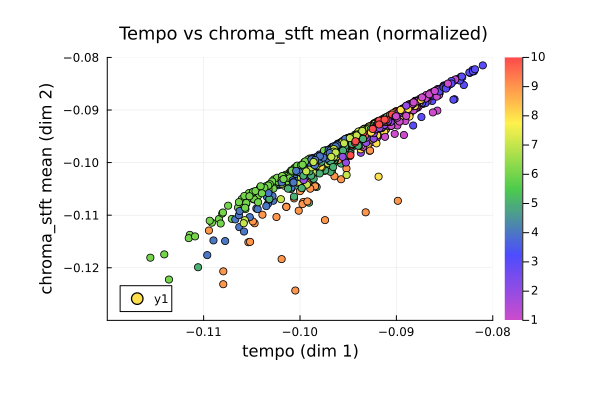

In [640]:
s = 4 
scatter(X[1, :], X[2, :], marker_z=km.assignments, color=:lightrainbow, ylims=(-0.13, -0.08), xlims=(-0.12, -0.08), legend=true, markersize=s, xlabel="tempo (dim 1)", ylabel="chroma_stft mean (dim 2)", title="\n Tempo vs chroma_stft mean (normalized)" , titlefont=font(12), bottom_margin = 10mm, top_margin = 5mm, left_margin = 10mm, right_margin = 10mm)



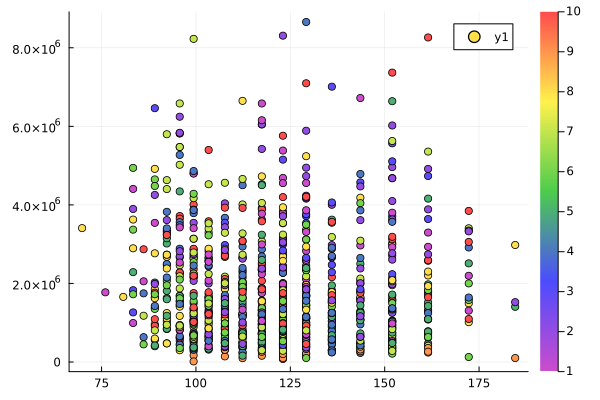

In [594]:
using Plots
scatter(transpose(data_num)[1, :], transpose(data_num)[31, :], marker_z=km.assignments, color=:lightrainbow, legend=true)

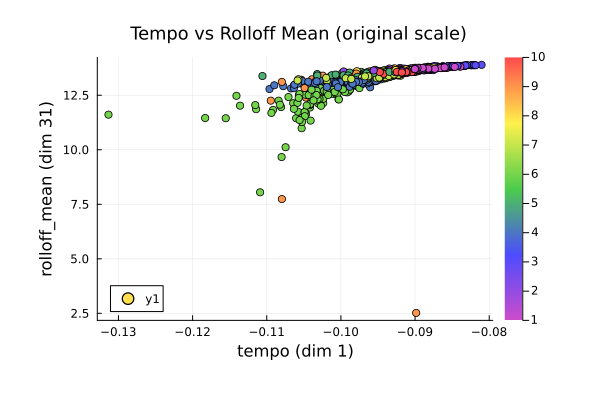

In [618]:
using Plots
using Plots.PlotMeasures
s = 4
scatter(X[1, :], X[31, :], marker_z=km.assignments, color=:lightrainbow, legend=true, markersize=s, xlabel="tempo (dim 1)", ylabel="rolloff_mean (dim 31)", title="\n Tempo vs Rolloff Mean (original scale)" , titlefont=font(12), bottom_margin = 10mm, top_margin = 5mm, left_margin = 10mm, right_margin = 10mm)


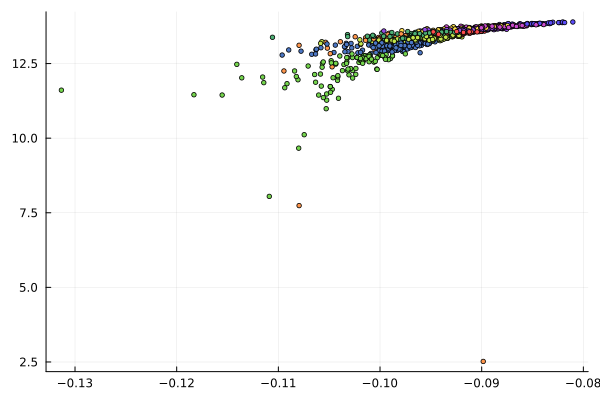

In [597]:
using Plots
s = 2.5
scatter(X[1, :], X[31, :], marker_z=km.assignments, color=:lightrainbow, legend=false, markersize=s)


In [598]:
# Access results, clusters to verify and interpret clustering results

@assert nclusters(km) == numClusters # verify the number of clusters

a = assignments(km) # get the assignments of points to clusters
#c = counts(km) # get the cluster sizes

#writedlm("cluster_sizes.txt", c)
# M = km.centers # get the cluster centers

999-element Vector{Int64}:
  8
  3
  8
  8
  2
  7
  5
  5
  3
  2
  ⋮
  2
 10
  8
  2
 10
  1
  7
  1
 10

Attempted DBSCAN's

In [599]:
#https://juliastats.org/Clustering.jl/dev/dbscan.html

In [600]:
using Plots

min_neighbors = 0.35;
min_pts = 10;
db_res = dbscan(transpose(A), 0.05, min_neighbors = 5, min_cluster_size = 20)

1-element Vector{DbscanCluster}:
 DbscanCluster(999, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  990, 991, 992, 993, 994, 995, 996, 997, 998, 999], Int64[])

In [601]:
points = randn(3, 10000)
# DBSCAN clustering, clusters with less than 20 points will be discarded:
clusters = dbscan(points, 0.05, min_neighbors = 3, min_cluster_size = 20)

DbscanCluster[]

In [602]:
scatter(X[:,1], X[:,2], zcolor=db_res.labels, 
        leg=false, 
        title="DBSCAN prediction\n(ϵ=$(5), minPts=$(20))")

ErrorException: type Array has no field labels

In [603]:
scatter(dim1, dim2, marker_z=db_res.assignments, color=:rainbow, legend=false,)# xlim=(-0.11, -0.09), ylim=(-0.12, -0.09))

ErrorException: type Array has no field assignments

MCL
Markov Cluster Algorithm

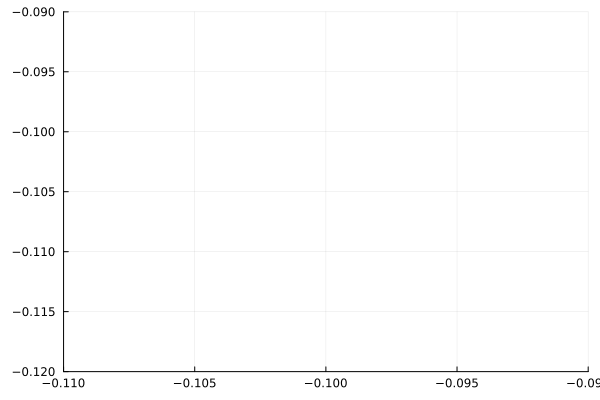

In [604]:
# good for first transform
result = mcl(laplacian)
using Plots
scatter(dim1, dim2, marker_z=result.assignments, color=:lightrainbow, legend=false, xlim=(-0.11, -0.09), ylim=(-0.12, -0.09))

In [605]:
result.counts

48-element Vector{Int64}:
 26
 29
 32
 25
 29
 15
 34
 46
 26
 44
  ⋮
  7
  3
 27
  1
  9
  2
  1
  1
  1

Random fuzzy_cmeans algorithm?

In [607]:
R = fuzzy_cmeans(X, 10, 2, maxiter=200, display=:iter)
M = R.centers

# get the point memberships over all the clusters
# memberships is a 20x3 matrix
memberships = R.weights

  Iters      center-change
----------------------------
      1       1.391927e+01


      2       1.463479e-01
      3       3.532998e-01
      4       4.869636e-01
      5       4.519687e-01


      6       4.550392e-01
      7       4.362026e-01
      8       3.487055e-01
      9       3.221342e-01


     10       3.549553e-01
     11       3.004302e-01
     12       2.044454e-01
     13       1.395084e-01


     14       9.813995e-02
     15       8.210303e-02
     16       8.794396e-02
     17       9.510706e-02


     18       9.606777e-02
     19       8.778308e-02
     20       7.499644e-02
     21       6.267373e-02
     22       5.238067e-02
     23       4.413897e-02
     24       3.764351e-02
     25       3.254849e-02


     26       2.853618e-02
     27       2.534174e-02
     28       2.275778e-02
     29       2.062843e-02
     30       1.883952e-02
     31       1.730879e-02


     32       1.597748e-02
     33       1.480375e-02
     34       1.375773e-02
     35       1.281787e-02
     36       1.196841e-02
     37       1.119750e-02


     38       1.049600e-02
     39       9.856564e-03
     40       9.273141e-03
     41       8.740548e-03
     42       8.254257e-03
     43       7.810231e-03


     44       7.404835e-03
     45       7.034765e-03
     46       6.697013e-03
     47       6.388832e-03
     48       6.107720e-03
     49       5.851394e-03


     50       5.617782e-03
     51       5.405001e-03
     52       5.211346e-03
     53       5.035278e-03


     54       4.875408e-03
     55       4.730486e-03
     56       4.599391e-03
     57       4.481119e-03
     58       4.374774e-03
     59       4.279559e-03


     60       4.194767e-03
     61       4.119777e-03
     62       4.054042e-03
     63       3.997090e-03


     64       3.948514e-03
     65       3.907970e-03
     66       3.875174e-03
     67       3.849898e-03
     68       3.831967e-03
     69       3.821262e-03


     70       3.817713e-03
     71       3.821303e-03
     72       3.832068e-03
     73       3.850096e-03
     74       3.875531e-03
     75       3.908577e-03
     76       3.949496e-03
     77       3.998622e-03


     78       4.056357e-03
     79       4.123185e-03
     80       4.199679e-03
     81       4.286511e-03
     82       4.384465e-03
     83       4.494451e-03


     84       4.617527e-03
     85       4.754918e-03
     86       4.908041e-03
     87       5.078542e-03
     88       5.268329e-03
     89       5.479621e-03


     90       5.715001e-03
     91       5.977486e-03
     92       6.270610e-03
     93       6.598519e-03
     94       6.966099e-03
     95       7.379116e-03
     96       7.844405e-03
     97       8.370085e-03


     98       8.965821e-03
     99       9.643147e-03
    100       1.041583e-02
    101       1.130032e-02
    102       1.231617e-02
    103       1.348656e-02


    104       1.483862e-02
    105       1.640356e-02
    106       1.821612e-02
    107       2.031286e-02
    108       2.272806e-02
    109       2.548582e-02


    110       2.858565e-02
    111       3.197915e-02
    112       3.553624e-02
    113       3.900543e-02
    114       4.198549e-02
    115       4.394475e-02


    116       4.433070e-02
    117       4.277366e-02
    118       3.929421e-02
    119       3.435950e-02
    120       2.871563e-02
    121       2.310523e-02
    122       1.805533e-02
    123       1.382096e-02


    124       1.044263e-02
    125       7.837215e-03
    126       5.872382e-03
    127       4.411271e-03
    128       3.333360e-03
    129       2.540918e-03


    130       1.958387e-03
    131       1.529030e-03
    132       1.211012e-03
    133       1.042235e-03
    134       9.420349e-04
Fuzzy C-means converged with 134 iterations (δ = 0.0009420349086936836)


999×10 Matrix{Float64}:
 0.00589709   0.00912486   0.0105667   …  0.475985   0.021776    0.00149391
 0.000987049  0.00130799   0.00168698     0.953535   0.003287    0.00026622
 0.00781906   0.00748821   0.0176141      0.0392807  0.0545448   0.00147006
 0.0105688    0.0219452    0.0177301      0.553315   0.0324519   0.00296821
 0.0145666    0.00677701   0.0373422      0.0351044  0.187523    0.00230316
 0.0593685    0.00305887   0.818958    …  0.0051797  0.0570872   0.00230852
 0.0427329    0.0162908    0.145775       0.023685   0.2443      0.00480265
 0.0461042    0.0127381    0.203275       0.020219   0.326939    0.00448285
 0.000642173  0.000944521  0.0011076      0.964665   0.00217148  0.000171745
 0.00670063   0.00414491   0.017529       0.0176163  0.0865032   0.00107494
 ⋮                                     ⋱                         
 0.00930922   0.00476314   0.0252134   …  0.0212087  0.152541    0.0014324
 0.0254082    0.00905644   0.0741883      0.0325155  0.41106     0.0034651

In [608]:
#km[]

In [609]:
dim1 = X[1, :]
dim2 = X[2, :]
dim3 = X[3, :]

dim1_orig = transpose(X)[1,:]
dim2_orig = transpose(X)[2,:]
dim3_orig = transpose(X)[3,:]
dim195_orig = transpose(X)[195,:]

197-element Vector{Float64}:
 -0.09480195952840058
 -0.09820999478326481
 -0.09821772838019938
 -0.09819246018556109
 -0.09822022147215034
 -0.09821271643574671
 -0.09821671954607057
 -0.09820481962602375
 -0.09821985196833245
 -0.09822023824861909
  ⋮
 -0.0984701348182479
 -0.09815993714592283
 -0.09832228170166182
 -0.09586996569012611
 -0.0976250764168508
 -0.09924339826052686
 -0.09830449603824823
 -0.09849695074817724
 -0.09814583600172072

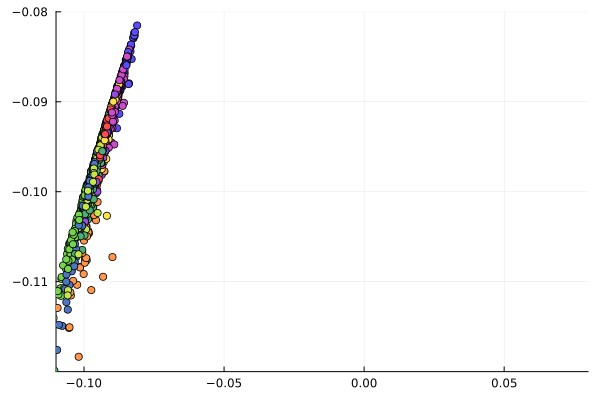

In [610]:
using Plots
scatter(dim1, dim2, marker_z=km.assignments, color=:lightrainbow, legend=false, xlims=(-0.11, 0.08), ylims=(-0.12, -0.08))